In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import sys

if not os.path.join(os.path.abspath(''), '../') in sys.path:
    sys.path.append(os.path.join(os.path.abspath(''), '../'))
    
from utils.classification import load_behaviors
from utils.meta import *
import matplotlib
import warnings
import seaborn as sns

### load predicted behaviors

In [2]:
behaviors = load_behaviors('../processed_dataset/behaviors_study5-morphine.pkl')

In [3]:
def get_transitions(predict, behavior_classes):
    class_int = [int(i) for i, behavior_name in enumerate(behavior_classes)]
    tm = [[0] * np.unique(class_int) for _ in np.unique(class_int)]
    for (i, j) in zip(predict, predict[1:]):
        tm[int(i)][int(j)] += 1
    tm_df = pd.DataFrame(tm)
    tm_array = np.array(tm)
    tm_norm = tm_array / tm_array.sum(axis=1)
    return tm_array, tm_norm

### plot -- Group (row) x Condition (column)

/var/folders/9t/fsgf0mhs7xl9nc_xmd9v_c780000gn/T/ipykernel_53491/2635141877.py:8: RuntimeWarning: invalid value encountered in divide
  tm_norm = tm_array / tm_array.sum(axis=1)
/var/folders/9t/fsgf0mhs7xl9nc_xmd9v_c780000gn/T/ipykernel_53491/2635141877.py:8: RuntimeWarning: invalid value encountered in divide
  tm_norm = tm_array / tm_array.sum(axis=1)
/var/folders/9t/fsgf0mhs7xl9nc_xmd9v_c780000gn/T/ipykernel_53491/2635141877.py:8: RuntimeWarning: invalid value encountered in divide
  tm_norm = tm_array / tm_array.sum(axis=1)
/var/folders/9t/fsgf0mhs7xl9nc_xmd9v_c780000gn/T/ipykernel_53491/2635141877.py:8: RuntimeWarning: invalid value encountered in divide
  tm_norm = tm_array / tm_array.sum(axis=1)
/var/folders/9t/fsgf0mhs7xl9nc_xmd9v_c780000gn/T/ipykernel_53491/2635141877.py:8: RuntimeWarning: invalid value encountered in divide
  tm_norm = tm_array / tm_array.sum(axis=1)


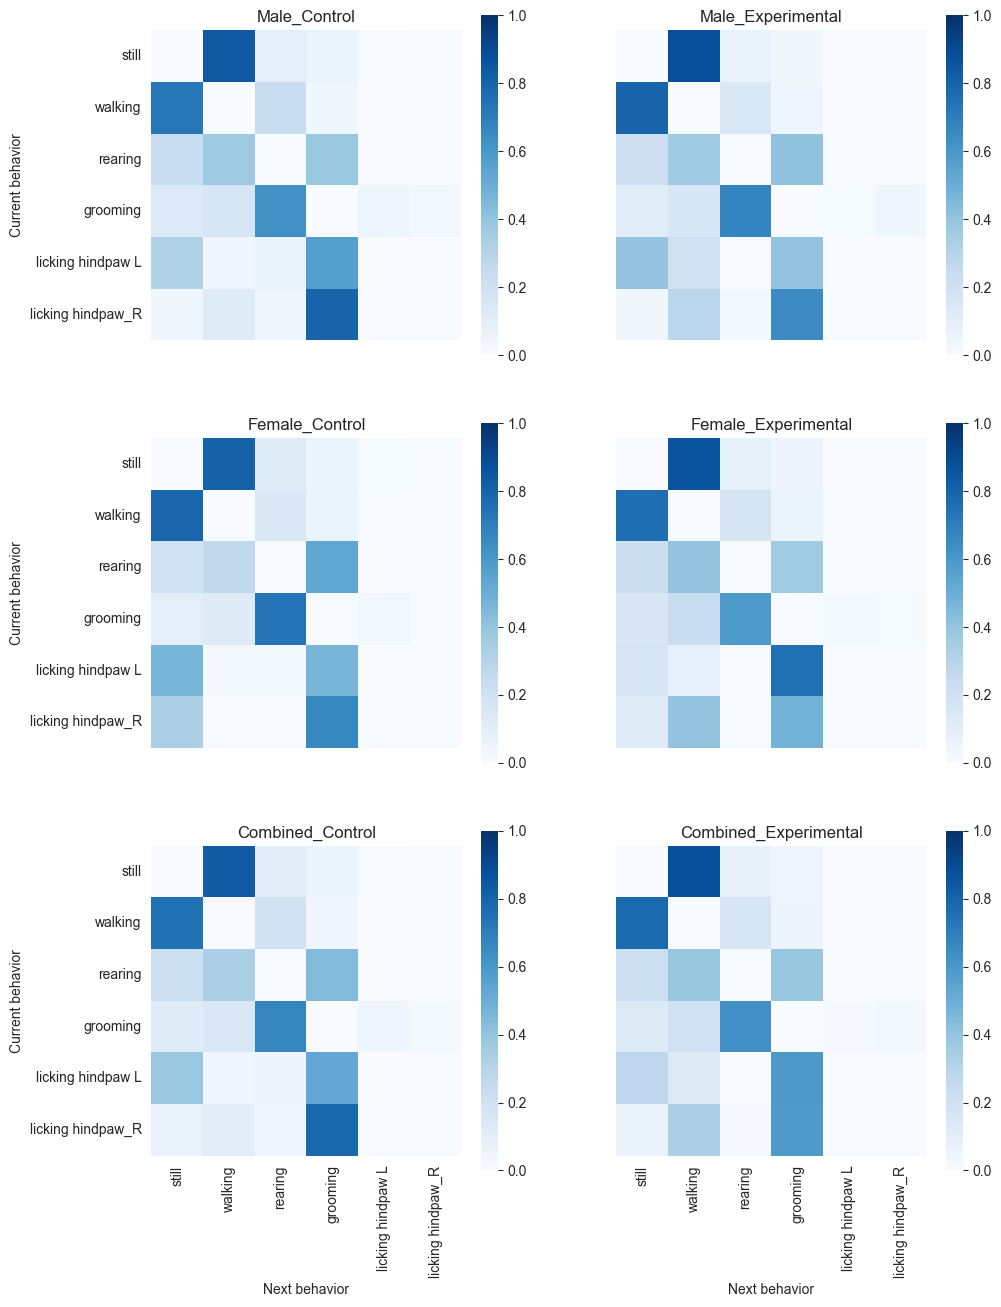

In [4]:
rows = len(groups_study5)
cols = len(conditions_study5)
count = 0
fig, ax = plt.subplots(rows, cols, figsize=(11, 15), sharex=False, sharey=True)

for row in range(rows):
    if row > 4:
        cols = 1
        fig.delaxes(ax[row, 1])
        fig.delaxes(ax[row, 2])
    else:
        cols = len(conditions_study5)
        
    for col in range(cols):
        
        selected_group = groups_study5[row]
        selected_condition = conditions_study5[col]
        
        class_int = [int(i) for i, behavior_name in enumerate(behavior_names)]
        all_count_tm = [[0] * np.unique(class_int) for _ in np.unique(class_int)]
        for f in range(len(behaviors[selected_group][selected_condition])):
            count_tm, prob_tm = get_transitions(behaviors[selected_group][selected_condition][f'file{f}'], behavior_names)
            np.fill_diagonal(count_tm, 0)
            all_count_tm += count_tm
        
        all_prob_tm = all_count_tm/all_count_tm.sum(axis=1)[:, None]
        transmat_df = pd.DataFrame(all_prob_tm, index=behavior_names, columns=behavior_names)
        transmat_df.to_csv(f'../processed_dataset/behavior_transitions/behavior_transitions_{groups_study5[row]}_{conditions_study5[col]}_oprm1-reexpress_morphine.csv')
        
        sns.heatmap(transmat_df, annot=False, cmap='Blues', cbar=True,
                    vmin=0, vmax=1,
                    ax=ax[row, col])
        
        if col == 0:
            ax[row, col].set_ylabel('Current behavior')
        # ax[row, col].set_xlabel('')
        
        if col == 1 or col == 2:
            if row == rows-1:
                ax[row, col].set_xlabel('Next behavior')
                ax[row, col].set_xticklabels(behavior_names)
            else:
                ax[row, col].set_xticklabels([])
                
        else:
            if row != rows - 1:
                ax[row, col].set_xticklabels([])
                
        if row == rows-1:
            ax[row, col].set_xlabel('Next behavior')
            
        ax[row, col].set_title(f'{groups_study5[row]}_{conditions_study5[col]}')
        
        ax[row, col].set_aspect('equal', adjustable='box')

       
plt.show()

### file save, change the extension to change the file format

In [5]:
fig.savefig(f'../figures/behavior_transitions_oprm1-reexpress_morphine.svg', 
            dpi=600, bbox_inches='tight')